In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # Visualization
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
from sklearn.preprocessing import MinMaxScaler
import torch # Library for implementing Deep Neural Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


In [2]:
df = pd.read_csv('Biotech_preprocessed_dataset.csv')
df

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,2024-01-04 15:00:00,15:00:00,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False
1,2024-01-04 16:00:00,16:00:00,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False
2,2024-01-04 17:00:00,17:00:00,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False
3,2024-01-04 18:00:00,18:00:00,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False
4,2024-01-04 19:00:00,19:00:00,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False,False
4455,2024-07-08 06:00:00,06:00:00,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False
4456,2024-07-08 07:00:00,07:00:00,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False
4457,2024-07-08 08:00:00,08:00:00,784.0,411.0,280.0,93.0,False,True,False,False,False,False,False,False


In [3]:
df['Time'] = pd.to_datetime(df['Time'])
df['TOD'] = df['Time'].dt.hour
df

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,2024-01-04 15:00:00,15,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False
1,2024-01-04 16:00:00,16,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False
2,2024-01-04 17:00:00,17,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False
3,2024-01-04 18:00:00,18,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False
4,2024-01-04 19:00:00,19,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,5,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False,False
4455,2024-07-08 06:00:00,6,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False
4456,2024-07-08 07:00:00,7,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False
4457,2024-07-08 08:00:00,8,784.0,411.0,280.0,93.0,False,True,False,False,False,False,False,False


**Drop unnecessary Columns**

In [4]:
df.drop(['Time', 'Phase_A (W)', 'Phase_B (W)', 'Phase_C (W)'], axis=1, inplace=True)
df

,TOD,Total (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,15,821.0,False,False,False,False,True,False,False,False
1,16,741.0,False,False,False,False,True,False,False,False
2,17,776.0,False,False,False,False,True,False,False,False
3,18,1260.0,False,False,False,False,True,False,False,False
4,19,973.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4454,5,1040.0,False,True,False,False,False,False,False,False
4455,6,1414.0,False,True,False,False,False,False,False,False
4456,7,571.0,False,True,False,False,False,False,False,False
4457,8,784.0,False,True,False,False,False,False,False,False


**Scale the Numerical Attributes**

In [5]:
columns_to_scale = ['TOD', 'Total (W)']
scaler = MinMaxScaler(feature_range=(0, 1))
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,TOD,Total (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,0.652174,0.074948,False,False,False,False,True,False,False,False
1,0.695652,0.063075,False,False,False,False,True,False,False,False
2,0.739130,0.068270,False,False,False,False,True,False,False,False
3,0.782609,0.140101,False,False,False,False,True,False,False,False
4,0.826087,0.097507,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...
4454,0.217391,0.107450,False,True,False,False,False,False,False,False
4455,0.260870,0.162956,False,True,False,False,False,False,False,False
4456,0.304348,0.037845,False,True,False,False,False,False,False,False
4457,0.347826,0.069457,False,True,False,False,False,False,False,False


**Convert the categorical attributes to numeric**

In [6]:
df['Friday'] = df['Friday'].astype(np.float32)
df['Monday'] = df['Monday'].astype(np.float32)
df['Saturday'] = df['Saturday'].astype(np.float32)
df['Sunday'] = df['Sunday'].astype(np.float32)
df['Thursday'] = df['Thursday'].astype(np.float32)
df['Tuesday'] = df['Tuesday'].astype(np.float32)
df['Wednesday'] = df['Wednesday'].astype(np.float32)
df['Holiday'] = df['Holiday'].astype(np.float32)
df

,TOD,Total (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,0.652174,0.074948,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.695652,0.063075,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.739130,0.068270,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.782609,0.140101,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.826087,0.097507,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4454,0.217391,0.107450,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4455,0.260870,0.162956,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4456,0.304348,0.037845,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4457,0.347826,0.069457,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


**Separate train and test data**

In [7]:
X = df.drop('Total (W)', axis=1, inplace=False).values
y = df['Total (W)'].values

print(X.shape, y.shape)

(4459, 9) (4459,)


In [8]:
train_size = int(len(X) * 0.8)

X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3567, 9) (3567,)
(892, 9) (892,)


In [9]:
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

print(X_train_tensor.shape, y_train_tensor.shape)
print(X_test_tensor.shape, y_test_tensor.shape)

torch.Size([3567, 9]) torch.Size([3567, 1])
torch.Size([892, 9]) torch.Size([892, 1])


In [10]:
batch_size = 16
train_dataset = torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test_tensor, y_test_tensor)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

In [11]:
for x, y in train_loader:
	print(f'X shape: {x.shape}, y shape: {y.shape}')
	break

X shape: torch.Size([16, 9]), y shape: torch.Size([16, 1])


In [12]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out, _ = self.lstm(x)
    out = self.fc(out)
    return out

In [13]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [14]:
input_size = 9
num_layers = 1
hidden_size = 28
output_size = 1

model = LSTM(input_size, hidden_size, num_layers).to(device)
loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(9, 28, batch_first=True)
  (fc): Linear(in_features=28, out_features=1, bias=True)
)


In [15]:
num_epochs = 20
train_mape_hist = []
test_mape_hist = []

for epoch in range(num_epochs):
  total_loss = 0.0
  train_error_tensor = torch.tensor([], dtype=torch.float32)

  model.train()
  for batch_X, batch_y in train_loader:
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    predictions = model(batch_X)
    loss = loss_fn(predictions, batch_y)
    error_tensor = (batch_y - predictions)*100.0/batch_y
    train_error_tensor = torch.cat((train_error_tensor, torch.abs(error_tensor)))

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()

  average_loss = total_loss / len(train_loader)
  # average_train_mape = int(train_error_tensor.mean())
  # train_mape_hist.append(average_train_mape)

  model.eval()
  with torch.no_grad():
    total_test_loss = 0.0
    test_error_tensor = torch.tensor([], dtype=torch.float32)

    for batch_X_test, batch_y_test in test_loader:
      batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
      predictions_test = model(batch_X_test)
      test_loss = loss_fn(predictions_test, batch_y_test)
      error_tensor = (batch_y_test - predictions_test)*100.0/batch_y_test
      test_error_tensor = torch.cat((test_error_tensor, torch.abs(error_tensor)))
      total_test_loss += test_loss.item()

    average_test_loss = total_test_loss / len(test_loader)
    # average_test_mape = int(test_error_tensor.mean())
    # test_mape_hist.append(average_test_mape)

In [35]:
train_error_np = train_error_tensor.detach().numpy()
train_error_np = train_error_np.reshape(-1)
mask = np.isfinite(train_error_np)
train_error_np = train_error_np[mask]
train_error_np.mean()

79.22321

In [36]:
test_error_np = test_error_tensor.detach().numpy()
test_error_np = test_error_np.reshape(-1)
mask = np.isfinite(test_error_np)
test_error_np = test_error_np[mask]
test_error_np.mean()

46.747776

In [ ]:
num_epochs = 20
train_hist =[]
test_hist =[]
# Training loop
for epoch in range(num_epochs):
	total_loss = 0.0

  # Training
	model.train()
	for batch_X, batch_y in train_loader:
		batch_X, batch_y = batch_X.to(device), batch_y.to(device)
		predictions = model(batch_X)
		loss = loss_fn(predictions, batch_y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		total_loss += loss.item()

	# Calculate average training loss and accuracy
	average_loss = total_loss / len(train_loader)
	train_hist.append(average_loss)

	# Validation on test data
	model.eval()
	with torch.no_grad():
		total_test_loss = 0.0

		for batch_X_test, batch_y_test in test_loader:
			batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
			predictions_test = model(batch_X_test)
			test_loss = loss_fn(predictions_test, batch_y_test)

			total_test_loss += test_loss.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(test_loader)
		test_hist.append(average_test_loss)
	if (epoch+1)%10==0:
		print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

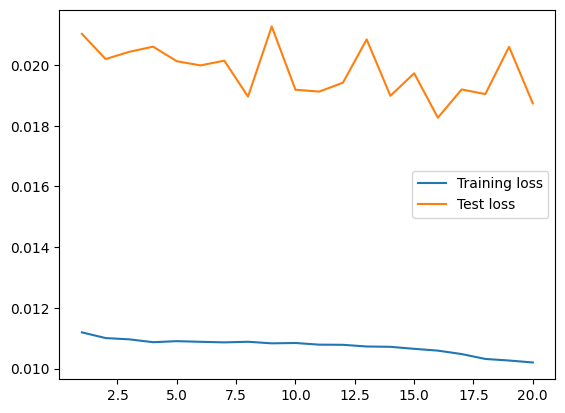

In [ ]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_hist,scalex=True, label="Training loss")
plt.plot(x, test_hist, label="Test loss")
plt.legend()
plt.show()

In [ ]:
sequence_length = 10
X_train, y_train = [], []
for i in range(len(scaled_train)-sequence_length):
  X_train.append(scaled_train[i:i+sequence_length])
  y_train.append(scaled_train[i+1:i+sequence_length+1])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((3557, 10, 1), (3557, 10, 1))

In [ ]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
print(X_train.shape, y_train.shape)

torch.Size([3557, 10, 1]) torch.Size([3557, 10, 1])


In [ ]:
sequence_length = 6
X_test, y_test = [], []
for i in range(len(scaled_test)-sequence_length):
  X_test.append(scaled_test[i:i+sequence_length])
  y_test.append(scaled_test[i+1:i+sequence_length+1])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print(X_test.shape, y_test.shape)

torch.Size([886, 6, 1]) torch.Size([886, 6, 1])


In [ ]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out, _ = self.lstm(x)
    out = self.fc(out)
    return out


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)


cpu


In [ ]:
input_size = 1
num_layers = 1
hidden_size = 28
output_size = 1

model = LSTM(input_size, hidden_size, num_layers).to(device)
loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(1, 28, batch_first=True)
  (fc): Linear(in_features=28, out_features=1, bias=True)
)


In [ ]:
batch_size = 16
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

In [ ]:
for x, y in train_loader:
	print(f'X shape: {x.shape}, y shape: {y.shape}')
	break

X shape: torch.Size([16, 10, 1]), y shape: torch.Size([16, 10, 1])


In [ ]:
num_epochs = 20
train_hist =[]
test_hist =[]
# Training loop
for epoch in range(num_epochs):
	total_loss = 0.0

	# Training
	model.train()
	for batch_X, batch_y in train_loader:
		batch_X, batch_y = batch_X.to(device), batch_y.to(device)
		predictions = model(batch_X)
		loss = loss_fn(predictions, batch_y)

		optimizer.zero_grad()
		loss.backward()
		optimizer.step()

		total_loss += loss.item()

	# Calculate average training loss and accuracy
	average_loss = total_loss / len(train_loader)
	train_hist.append(average_loss)

	# Validation on test data
	model.eval()
	with torch.no_grad():
		total_test_loss = 0.0

		for batch_X_test, batch_y_test in test_loader:
			batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
			predictions_test = model(batch_X_test)
			test_loss = loss_fn(predictions_test, batch_y_test)

			total_test_loss += test_loss.item()

		# Calculate average test loss and accuracy
		average_test_loss = total_test_loss / len(test_loader)
		test_hist.append(average_test_loss)
	if (epoch+1)%10==0:
		print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')


Epoch [10/20] - Training Loss: 0.0075, Test Loss: 0.0129
Epoch [20/20] - Training Loss: 0.0075, Test Loss: 0.0129


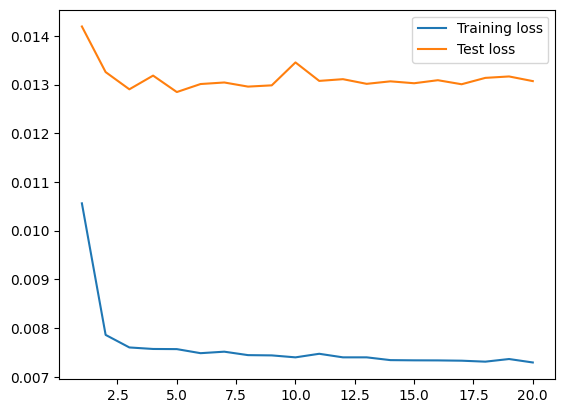

In [ ]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_hist,scalex=True, label="Training loss")
plt.plot(x, test_hist, label="Test loss")
plt.legend()
plt.show()
